In [1]:
# Student file questions search %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import openpyxl as xls

#pd.set_option('display.max_columns', 35)
#pd.set_option('display.width', 1050)

In [2]:
# Store filepath as a variable
student_data = sorted(glob('student*.csv'))
student_data

['student-mat.csv', 'student-por.csv']

In [3]:
# Read our Data file with the pandas library
mergeddata = pd.concat(pd.read_csv(studentData).assign(sourcefilename = studentData)
                        for studentData in student_data)

In [4]:
mergeddata.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,student-mat.csv
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,student-mat.csv
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,student-mat.csv
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,student-mat.csv
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,student-mat.csv


In [5]:
# merged data to new excel file and to excel
excel_file = pd.ExcelWriter("student-new.xlsx")
mergeddata.to_excel(excel_file)
excel_file.save()

In [6]:
# describe the raw data
mergeddata.describe().style.format('{0:,.2f}')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,"1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00","1,044.00"
mean,16.73,2.60,2.39,1.52,1.97,0.26,3.94,3.20,3.16,1.49,2.28,3.54,4.43,11.21,11.25,11.34
std,1.24,1.12,1.10,0.73,0.83,0.66,0.93,1.03,1.15,0.91,1.29,1.42,6.21,2.98,3.29,3.86
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,9.00,9.00,10.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [7]:
mergeddata.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'sourcefilename'],
      dtype='object')

In [8]:
# grade range from 0 to 20 scale
# caculate students avegrage grades with 3 scores G1, G2, G3 and put in column 
#avgGrade = mergeddata.loc[:,[(mergeddata["G1"]+mergeddata["G2"]+mergeddata["G3"])/3]]
avgGrade = mergeddata.loc[:, ["G1", "G2", "G3"]].mean(axis=1)
avgGradeDF = pd.DataFrame((avgGrade), columns = ["Avg Grade"])
avgGradeDF


#goodreads_df['Total Reviews'] = goodreads_df.iloc[:, 4:].sum(axis=1)
#total_reviews = sum(goodreads_df['Total Reviews'])

,Avg Grade
0,5.666667
1,5.333333
2,8.333333
3,14.666667
4,8.666667
...,...
644,10.333333
645,15.333333
646,10.666667
647,10.000000


In [9]:
# add column for average grade to merge file
mergeddata["Avg Grade"] = avgGradeDF
mergeddata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename,Avg Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,student-mat.csv,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,student-mat.csv,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,student-mat.csv,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,student-mat.csv,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,student-mat.csv,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,student-por.csv,10.333333
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,student-por.csv,15.333333
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,student-por.csv,10.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,student-por.csv,10.000000


In [10]:
# Create bins for avgGrade and transform to letter grade
grade_bins = [0, 11.9, 13.9, 15.9, 17.9, 20]
letter_grade = ["F", "D", "C", "B", "A"]

# mergeddata['Grade Range']
mergeddata["Letter Grade"] = pd.cut(mergeddata["Avg Grade"], grade_bins, labels=letter_grade)
mergeddata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,sourcefilename,Avg Grade,Letter Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,student-mat.csv,5.666667,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,student-mat.csv,5.333333,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,student-mat.csv,8.333333,F
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,student-mat.csv,14.666667,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,student-mat.csv,8.666667,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,1,2,5,4,10,11,10,student-por.csv,10.333333,F
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,4,15,15,16,student-por.csv,15.333333,C
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,6,11,12,9,student-por.csv,10.666667,F
647,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,6,10,10,10,student-por.csv,10.000000,F


In [11]:
# Looking only at grade F students with parent avg education
avgParentEdu = mergeddata.loc[:, ["Medu", "Fedu"]].sum(axis=1)/2
avgParentEduDF = pd.DataFrame(avgParentEdu, columns = ["Avg Parents Edu"])
avgParentEduDF

,Avg Parents Edu
0,4.0
1,1.0
2,1.0
3,3.0
4,3.0
...,...
644,2.5
645,2.0
646,1.0
647,2.0


In [12]:
# add columns for average parents' education 
# add column for average grade to merge file
mergeddata["Avg Parents Edu"] = avgParentEduDF
mergeddata

#mergeddata["Letter Grade"] = pd.cut(mergeddata["Avg Grade"], grade_bins, labels=letter_grade)
#mergeddata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,sourcefilename,Avg Grade,Letter Grade,Avg Parents Edu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,student-mat.csv,5.666667,F,4.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,student-mat.csv,5.333333,F,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,student-mat.csv,8.333333,F,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,student-mat.csv,14.666667,C,3.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,student-mat.csv,8.666667,F,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,student-por.csv,10.333333,F,2.5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,student-por.csv,15.333333,C,2.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,6,11,12,9,student-por.csv,10.666667,F,1.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,student-por.csv,10.000000,F,2.0


In [13]:
# Count the totals for each letter grade
pd.DataFrame(mergeddata["Letter Grade"].value_counts())

,Letter Grade
F,587
D,239
C,142
B,59
A,17


In [14]:
# Parents Education level combine mother and father avg
# eduaction range from 0-4 from low to high

In [15]:
# Sorting the DataFrame based on "avg grade" column
# Will sort from lowest to highest if no other parameter is passed
sortAvgGrade_df = mergeddata.sort_values("Letter Grade")
sortAvgGrade_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,sourcefilename,Avg Grade,Letter Grade,Avg Parents Edu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,student-mat.csv,5.666667,F,4.0
189,GP,M,17,U,LE3,T,4,3,teacher,other,...,4,4,0,10,11,11,student-por.csv,10.666667,F,3.5
191,GP,M,17,U,GT3,T,3,3,other,other,...,4,4,4,11,9,10,student-por.csv,10.000000,F,3.0
192,GP,M,16,R,GT3,T,4,2,teacher,services,...,4,3,8,10,9,11,student-por.csv,10.000000,F,3.0
193,GP,M,17,U,GT3,T,4,3,other,other,...,1,2,4,11,11,13,student-por.csv,11.666667,F,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,MS,F,18,U,GT3,T,4,4,teacher,teacher,...,2,1,0,18,18,18,student-por.csv,18.000000,A,4.0
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,1,3,10,18,19,19,student-mat.csv,18.666667,A,3.0
617,MS,F,18,U,LE3,T,1,1,at_home,services,...,1,4,0,19,17,18,student-por.csv,18.000000,A,1.0
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,1,5,2,19,18,18,student-mat.csv,18.333333,A,4.0


In [65]:
# parent avg education v.s.student grade with letter grade
# Create an array that contains the number of Ave Parents Eduaction each

#users = [13000, 26000, 52000, 30000, 9000]
#x_axis = np.arange(len(users))
#plt.bar(x_axis, users, color ='r', alpha=0.5, align="center")

Pedu = pd.DataFrame(mergeddata["Avg Parents Edu"].value_counts())
Pedu
#x_axis = np.arange(0, 4, 0.5) 
#x_axis=np.arrange(len('Avg Parents Edu'))

#x_axis = np.arange(len(users))
# make a bar chart thru matplotlib

# avg parent edu is y axis and x_axis is paid meal yes or no
#plt.bar(x_axis, Pedu, color= 'g', aipha=1, align='center')

# We apply align="edge" to ensure our bars line up with our tick marks
#plt.bar(x_axis, users, color ='r', alpha=0.5, align="center")

,Avg Parents Edu
2.0,202
4.0,165
3.0,153
1.0,134
1.5,131
3.5,125
2.5,124
0.5,9
0.0,1


In [16]:
# Looking only at grade F students with different reasons
avgF_df1 = sortAvgGrade_df.loc[sortAvgGrade_df["Letter Grade"] == "F", :]
avgF_df = avgF_df1.groupby(['Avg Parents Edu','paid'])
avgF_df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,sourcefilename,Avg Grade,Letter Grade,Avg Parents Edu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,student-mat.csv,5.666667,F,4.0
189,GP,M,17,U,LE3,T,4,3,teacher,other,...,4,4,0,10,11,11,student-por.csv,10.666667,F,3.5
191,GP,M,17,U,GT3,T,3,3,other,other,...,4,4,4,11,9,10,student-por.csv,10.000000,F,3.0
192,GP,M,16,R,GT3,T,4,2,teacher,services,...,4,3,8,10,9,11,student-por.csv,10.000000,F,3.0
193,GP,M,17,U,GT3,T,4,3,other,other,...,1,2,4,11,11,13,student-por.csv,11.666667,F,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,GP,F,16,U,GT3,T,3,3,other,other,...,3,4,0,7,7,8,student-mat.csv,7.333333,F,3.0
313,GP,F,19,U,LE3,T,3,2,services,other,...,2,1,22,13,10,11,student-mat.csv,11.333333,F,2.5
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,1,2,7,10,10,student-mat.csv,9.000000,F,1.0
97,GP,F,16,U,GT3,T,2,1,other,other,...,1,5,2,8,9,10,student-mat.csv,9.000000,F,1.5


In [17]:
# look at all grade meal paid 
avgF_meal_df= pd.DataFrame(avgF_df["paid"].value_counts())
avgF_meal_df

paid
Avg Parents Edu paid paid      
0.0             no   no       1
0.5             no   no       6
1.0             no   no      84
                yes  yes     10
1.5             no   no      77
                yes  yes     11
2.0             no   no      98
                yes  yes     30
2.5             no   no      58
                yes  yes     15
3.0             no   no      56
                yes  yes     19
3.5             no   no      33
                yes  yes     25
4.0             no   no      39
                yes  yes     25

In [20]:
avgPedu = [0.0,0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
MealPaidNo = [1,6, 64, 77, 98, 58, 56, 33, 39]
MealPaidYes=[0, 0, 10, 11, 30, 15, 19, 25, 25]

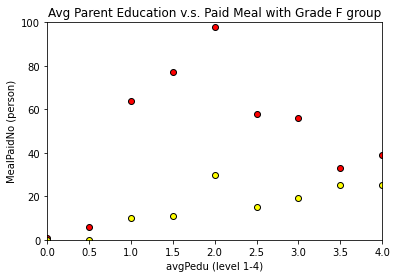

In [44]:
# create a scatter plot with F grade and parent avg education, weather paid meal yes or no
# Set the upper and lower limits of our y axis
plt.ylim(0,100)

# Set the upper and lower limits of our x axis
plt.xlim(0.0, 4.0)

# Create a title, x label, and y label for our chart
plt.title("Avg Parent Education v.s. Paid Meal with Grade F group")
plt.xlabel("avgPedu (level 1-4)")
plt.ylabel("MealPaidNo (person)")

plt.scatter(avgPedu, MealPaidNo, marker="o", facecolors="red", edgecolors="black")
plt.scatter(avgPedu, MealPaidYes, marker="o", facecolors="yellow", edgecolors="black")
# plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black", s=scoop_price)

In [46]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("../Images/student performance background_parents.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Images/student performance background_parents.png'

<Figure size 432x288 with 0 Axes>

In [26]:
# look at F grade meal paid 
avgF_meal_df= pd.DataFrame(avgF_df1["paid"].value_counts())
avgF_meal_df

,paid
no,452
yes,135


In [27]:
pies = ["Yes", "No"]
pie_paid = [135,452]
colors = ["yellow","lightblue"]
explode = (0.1,0)

FileNotFoundError: [Errno 2] No such file or directory: '../Images/student performance background_parents.png'

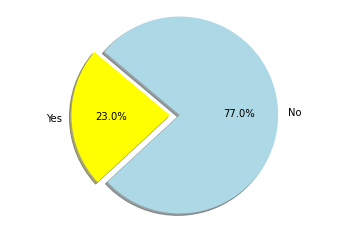

In [47]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_paid, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/student performance background_parents.png")
plt.show()

In [48]:
avgF_meal_df= ("avg parents edu", "avg grade", "paid")
avgF_meal_df

('avg parents edu', 'avg grade', 'paid')

In [49]:
# Looking only at grade F students with parent avg education

In [50]:
mergeddata.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'sourcefilename',
       'Avg Grade', 'Letter Grade', 'Avg Parents Edu'],
      dtype='object')